# Plot beam maps per antenna
using the spline maps

In [13]:
import os
from astropy.io import fits
import pandas as pd
from astropy import modeling
import numpy as np
import matplotlib as mpl
from matplotlib import gridspec
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.interpolate import RectBivariateSpline
from reproject import reproject_interp

mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [14]:
#freq_label = np.array([1234867750.0, 1253178250.0, 1271488750.0, 1289799250.0, 1308109750.0, 1326420250.0, 1344730750.0, 1363041250.0, 1381351750.0, 1399662250.0])
#freq_label_gh = np.round(freq_label/1e9,2)

chan = np.arange(0,18)
freq_label = 1299345884.0 + 12207000.0 * chan
freq_label_gh = np.round(freq_label/1e9,2)

In [17]:
# Plot beam maps from each antenna and each channel

date = '211103'
ant_names = ['RT2', 'RT3', 'RT4', 'RT5', 'RT6', 'RT7', 'RT8', 'RT9', 'RTA', 'RTB','RTC', 'RTD']

def plot_antenna_maps(date, ant):
    nrows = 7
    ncols = 7*2+1
    beams = 40
    
    for chan in range(18):
    #for chan in [5]:
        fig = plt.figure(figsize=(12,13.5))
        gs = gridspec.GridSpec(nrows=nrows, ncols=ncols, figure=fig) #, width_ratios=[1]*ncols, height_ratios=[1]*nrows, wspace=0.4, hspace=0.7)

        # Arrange the plots approx according to beam spacing (only beam 0 really fails)
        ax = [None] * beams
        for b in range(beams-1,-1,-1):
            if (b <= 39) & (b >= 33):
                ax[b] = fig.add_subplot(gs[0,2*(39-b):2*(39-b)+2])
            if (b <= 32) & (b >= 27):
                ax[b] = fig.add_subplot(gs[1,2*(32-b)+1:2*(32-b)+2+1])
            if (b <= 26) & (b >= 21):
                ax[b] = fig.add_subplot(gs[2,2*(26-b)+2:2*(26-b)+2+2])
            if (b == 0):
                ax[b] = fig.add_subplot(gs[3,2*3:2*3+2])
            if (b <= 20) & (b >= 15):
                ax[b] = fig.add_subplot(gs[4,2*(20-b)+1:2*(20-b)+2+1])
            if (b <= 14) & (b >= 8):
                ax[b] = fig.add_subplot(gs[5,2*(14-b):2*(14-b)+2])
            if (b <= 7) & (b >= 1):
                ax[b] = fig.add_subplot(gs[6,2*(7-b)+1:2*(7-b)+2+1])
            ax[b].set_xticks([])
            ax[b].set_yticks([])


        for b in range(beams):
            hdu = fits.open('/tank/apertif/driftscans/fits_files/{}/ant_{}/beam_models/{}_{:02}_I_model.fits'.format(date, ant, date, b))

            data = hdu[0].data
            data = data[chan,:,:]
            m = np.where(data==np.max(data))
            c1, c2 = hdu[0].header['CRPIX1'], hdu[0].header['CRPIX2']
            ax[b].imshow(data, cmap='viridis', vmin=0, vmax=1)
            ax[b].set_title('CB '+str(b).zfill(2), fontsize=18)
            ax[b].scatter(c1,c2,s=2, color='k')
            ax[b].scatter(m[1],m[0],s=2, color='r')
            ax[b].contour(data, levels=[0,0.2,.4,.60,.80], colors='w')
            #ax[b].invert_yaxis()

        #fig.suptitle("Beam maps {} {} GHz ant {}".format(date, freq_label_gh[chan], ant+1), size=18)
        fig.suptitle("{} {} GHz".format(ant_names[ant], freq_label_gh[chan]), size=32)
        plt.savefig('/tank/denes/drift_scan/plots/{0}/{0}_chan{1}_ant_{2}.png'.format(date, chan, ant), bbox_inches="tight", dpi=200)


FileNotFoundError: [Errno 2] No such file or directory: '/tank/apertif/driftscans/fits_files/211103/ant_0/beam_models/211103_00_I_model.fits'

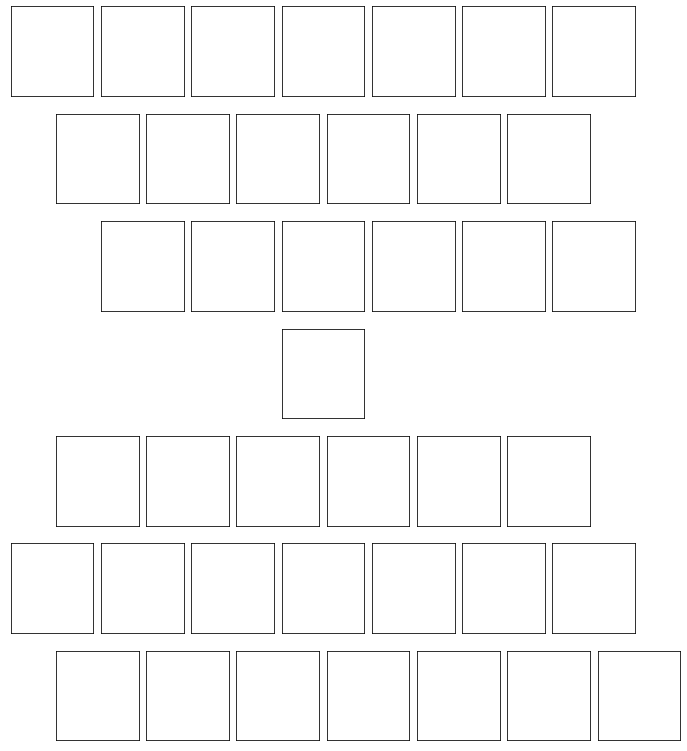

In [18]:
# date = '201028' 
date = '190821' # has all 12 antennas
#date = '200430'
#date = '201009'
date = '211103'

antennas = range(12)

for ant in antennas:
    plot_antenna_maps(date, ant)

# Plot individual beam

/home/apercal/pipeline/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: The following kwargs were not used by contour: 'linestyle'


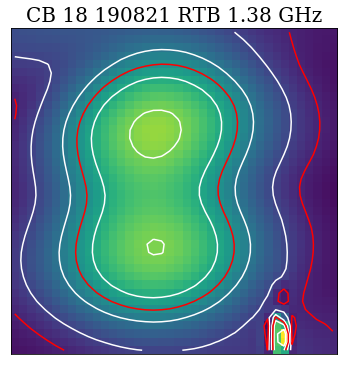

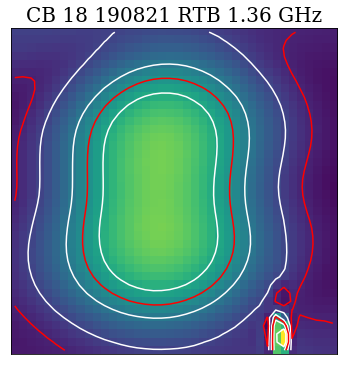

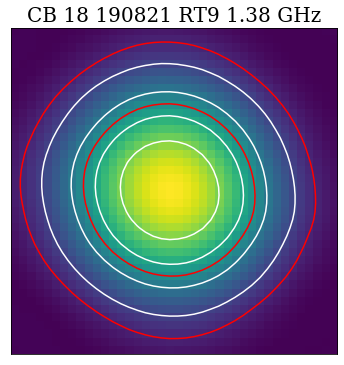

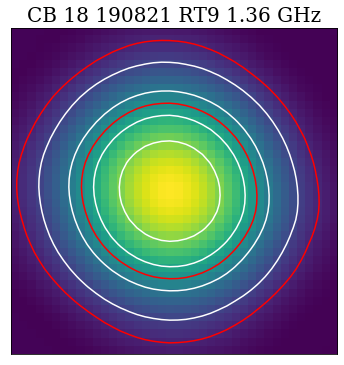

In [23]:
# Plot beam maps from each antenna and each channel

date = '201028'
ant_names = ['RT2', 'RT3', 'RT4', 'RT5', 'RT6', 'RT7', 'RT8', 'RT9', 'RTA', 'RTB','RTC', 'RTD']

def plot_antenna_maps(date, ant, beam, chan):
    nrows = 7
    ncols = 7*2+1
    beams = 40
    
    fig = plt.figure(figsize=(7,6))

    # Arrange the plots approx according to beam spacing (only beam 0 really fails)
    ax = fig.add_subplot(111)
    ax.set_xticks([])
    ax.set_yticks([])

    hdu = fits.open('/tank/apertif/driftscans/fits_files/{}/ant_{}/beam_models/{}_{:02}_I_model.fits'.format(date, ant, date, beam))

    data = hdu[0].data
    data = data[chan,:,:]
    c1, c2 = hdu[0].header['CRPIX1'], hdu[0].header['CRPIX2']
    ax.imshow(data, cmap='viridis', vmin=0, vmax=1)
    ax.contour(data, levels=[0,0.2,0.4,0.6,0.8], colors='w')
    ax.contour(data, levels=[0.1, 0.5], colors='r', linestyle=':')
    #ax.contour(cb, levels=[0.5], colors='r', linestyle=':')
    #ax.set_title("Beam {}".format(beam), size=10)

    plt.title("CB {} {} {} {} GHz".format(beam, date, ant_names[ant], freq_label_gh[chan]), size=20)    
    plt.savefig('/tank/denes/drift_scan/plots/{}/{}_ant{}_beam_{:02d}_chan_{}.png'.format(date, date, ant, beam, chan), dpi=100, bbox_inches="tight")

plot_antenna_maps('190821', 9, 18, 7)
plot_antenna_maps('190821', 9, 18, 5)
plot_antenna_maps('190821', 7, 18, 7)
plot_antenna_maps('190821', 7, 18, 5)